In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fractional_helper import FractionalGradientHelper
from armijo import ArmijoLineSearch
from optimizer import Optimizer
from trainer import GradientDescentTrainer
from losses import logistic_loss, softmax_loss, mse_loss, hinge_loss
from plot_utils import plot_training_loss, plot_accuracy, compare_optimizers, plot_accuracy_bars, plot_rmse_bars


df = pd.read_csv("diabetes.csv")   

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
optimizer = Optimizer("lion", lr=0.0005, beta=0.95, use_fractional=True, alpha=0.5, memory=10)

trainer = GradientDescentTrainer(
    optimizer=optimizer,
    objective_function=logistic_loss,  
    tol=1e-9,
    print_every=100
)


w_init = np.zeros(X_train.shape[1])
b_init = 0.0

w_opt, b_opt, losses = trainer.train(w_init, b_init, X_train, y_train, epochs=20000)

Epoch 100 | Loss=0.620723 | ||Δ||=5.000072e-04
Epoch 200 | Loss=0.614532 | ||Δ||=5.000482e-04
Epoch 300 | Loss=0.611733 | ||Δ||=5.000482e-04
Epoch 400 | Loss=0.609565 | ||Δ||=5.000482e-04
Epoch 500 | Loss=0.607536 | ||Δ||=5.000482e-04
Epoch 600 | Loss=0.605895 | ||Δ||=5.000887e-04
Epoch 700 | Loss=0.603692 | ||Δ||=5.000887e-04
Epoch 800 | Loss=0.602007 | ||Δ||=5.000887e-04
Epoch 900 | Loss=0.599857 | ||Δ||=5.000887e-04
Epoch 1000 | Loss=0.597789 | ||Δ||=5.000482e-04
Epoch 1100 | Loss=0.596163 | ||Δ||=5.000907e-04
Epoch 1200 | Loss=0.594172 | ||Δ||=5.000937e-04
Epoch 1300 | Loss=0.592678 | ||Δ||=5.000992e-04
Epoch 1400 | Loss=0.590716 | ||Δ||=5.001022e-04
Epoch 1500 | Loss=0.588812 | ||Δ||=5.000482e-04
Epoch 1600 | Loss=0.588925 | ||Δ||=5.001077e-04
Epoch 1700 | Loss=0.586015 | ||Δ||=5.001077e-04
Epoch 1800 | Loss=0.583639 | ||Δ||=5.001077e-04
Epoch 1900 | Loss=0.582171 | ||Δ||=5.001107e-04
Epoch 2000 | Loss=0.580810 | ||Δ||=5.001132e-04
Epoch 2100 | Loss=0.579611 | ||Δ||=5.001142e-04
E

In [9]:
y_pred = trainer.predict(X_test, w_opt, b_opt)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.7922


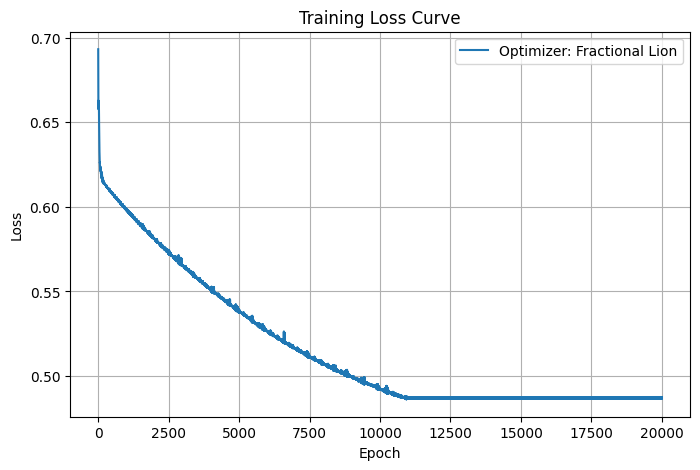

In [10]:
plot_training_loss(losses, optimizer_name='Fractional Lion')

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\daal4py\sklearn\linear_model\logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
pred = lr.predict(X_test)
accuracy = np.mean(pred == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.7532
